## Introduction to scikit learn

What we going to cover

0. [An end-to-end Scikit-Learn workflow](#0.-An-end-to-end-Scikit-Learn-workflow)
1. [Getting the data ready](#1.-Getting-the-data-ready-to-be-used-with-machine-learning)
2. [Choose the right estimator/algorithm for our problems](#2.-Chosing-right-estimator-or-algorithm-for-your-problem)
3. [Fit the model/algorithm and use it to make predictions on our data](#3.-Fit-the-model/algorithm-and-use-it-to-make-predictions-on-our-data)
4. [Evaluating a model](#4.-Evaluating-a-model)
5. Improve a model
6. Save and load a trained model
7. Putting it all together!



**Links for Feature Scaling**
1. __[https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310](https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310)__
2. __[https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)__
3. __[https://benalexkeen.com/feature-scaling-with-scikit-learn/](https://benalexkeen.com/feature-scaling-with-scikit-learn/)__

**Links for ROC and AUC**
1. __[https://www.youtube.com/watch?v=4jRBRDbJemM](https://www.youtube.com/watch?v=4jRBRDbJemM)__
2. __[https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)__

**Which model to choose - Scikit learn Cheat sheet**
* __[https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)__

**Check this for Google's Courses**
1. __[https://developers.google.com/machine-learning/foundational-courses](https://developers.google.com/machine-learning/foundational-courses)__

## 0. An end-to-end Scikit-Learn workflow


In [7]:
# Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# create X (feature matrix)
X = heart_disease.drop('target', axis=1)

# create y (labels)
y = heart_disease['target']

In [9]:
# 2. choose right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3 . fit the model to training data


In [10]:

from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_label = clf.predict(np.array([1,2,3])) # it wont work bcz the model is trained on different data format

/home/harish/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

y_preds = clf.predict(x_test)

In [ ]:

y_preds

In [ ]:
y_test

### 4 .Evaluate the model on training and test data

In [ ]:

clf.score(X_train, y_train)


In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_preds, y_test))

In [ ]:
confusion_matrix(y_preds, y_test)

In [ ]:
accuracy_score(y_preds, y_test)

### 5. Improve the model

In [ ]:
np.random.seed(43)
for i in range(10,100,10):
    print(f"Training model with {i} estimator..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set : {clf.score(x_test, y_test)*100:.2f}%")
    print('')
    

### 6 . Save the model

In [ ]:
clf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
clf.score(x_test, y_test)

In [ ]:
import pickle
pickle.dump(clf, open("randm_forest.pkl","wb"))

In [ ]:
loaded_model = pickle.load(open("randm_forest.pkl", 'rb'))
loaded_model.score(x_test, y_test)

# DETAILED OVERVIEW

## 1. Getting the data ready to be used with machine learning


Three main things:
1. Split the data into features and labels(usually `X` and `y`
2. Filling (also called imputing) or disregarding missing value
3. Non-numeric value to numeric (also called feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
X= heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [ ]:
X.head()

In [ ]:

y.head()

In [ ]:
#splitting the dataset to training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2 )

In [ ]:
X_train.shape


### 1.1 Make it all numerical (Feature encoding)

In [ ]:
car_sales = pd.read_csv('../data/car-sales-extended.csv')

In [ ]:
car_sales.head()

In [ ]:
car_sales.info()

In [ ]:
# split the data
X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

# Splitting to Train and Test set
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
#Building machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)


In [ ]:
car_sales['Doors'].value_counts()

In [ ]:
car_sales.head()

In [ ]:
#Turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#here we can also convert doors column since it is categorical
categorical_features  = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                               remainder='passthrough')

In [ ]:
transformed_X = transformer.fit_transform(X)

In [ ]:
transformed_X

In [ ]:
 pd.DataFrame(transformed_X)

In [ ]:
# Let's refit the model

np.random.seed(22)
X_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

In [ ]:
model.score(x_test,y_test)

### =================================================================================

### 1.2 What if there are missing values?
1. Fill them with some value(also known as imputation)
2. Remove the samples with missing data


In [ ]:
# import car sales missing data
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')


In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Lets convert text to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']


#here we can also convert doors column since it is categorical
categorical_features  = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)

### Option 1 : Filling missing values with panda

In [ ]:
car_sales_missing['Doors'].value_counts()

In [ ]:
car_sales_missing['Make'].fillna("missing", inplace=True)
car_sales_missing['Colour'].fillna("missing", inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)


In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#We do remove the missing values for price since without it, it is harder to predict
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
# Lets convert text to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']


#here we can also convert doors column since it is categorical
categorical_features  = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)

In [ ]:
model = RandomForestRegressor()

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(x_test, y_test)

### Option 2 : Filling missing value with Sklearn

In [ ]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')

In [ ]:
car_sales_missing.head()

In [ ]:
car_sales_missing.info()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:

car_sales_missing.dropna(subset=['Price'],inplace=True)

In [ ]:
car_sales_missing.info()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Filling categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']


#Create an imputer (something tht fills up the data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer,cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

filled_X = imputer.fit_transform(X)

In [ ]:
filled_X

In [ ]:
car_sale_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Odometer (KM)', 'Doors'])
car_sale_filled

In [ ]:
# Lets convert text to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# X = car_sales_missing.drop('Price', axis=1)
# y = car_sales_missing['Price']


#here we can also convert doors column since it is categorical
categorical_features  = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sale_filled)


In [ ]:
#Lets Train the values
np.random.seed(32)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, x_test, y_train,y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()

In [ ]:
model.fit(X_train, y_train)
model.score(x_test, y_test)

## 2. Chosing right estimator or algorithm for your problem

Sklearn refer machine learning algorithm and models as ***Estimators***

Cheat_sheet - __[https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)_

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
housing = fetch_california_housing()
housing

In [ ]:
print(housing['DESCR'])

In [ ]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df.head()

In [ ]:
housing_df['Target'] = housing['target']

In [ ]:
housing_df.head()

In [ ]:
housing_df.info()

In [ ]:
#splitting the data
np.random.seed(42)

X= housing_df.drop('Target', axis=1)
y = housing_df['Target']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
housing_df.isna().sum()

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(42)
model = Ridge()
model.fit(X_train, y_train)
model.score(x_test, y_test)

In [ ]:
from sklearn.svm import SVR

np.random.seed(42)
model = SVR()
model.fit(X_train, y_train)
model.score(x_test,y_test)

In [ ]:
#using a Randomforest
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X= housing_df.drop('Target', axis=1)
y = housing_df['Target']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(x_test,y_test)

## 2.2 Choosing an estimator for classification


Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

In [ ]:
len(heart_disease)


**Consulting the map and it says to use `LinearSVC`**

In [ ]:
from sklearn.svm import LinearSVC

# setting up the random seed
np.random.seed(42)

# Make the Data
X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

# Split the data
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(x_test, y_test)

In [ ]:
heart_disease['target'].value_counts()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# setting up the random seed
np.random.seed(42)

# Make the Data
X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

# Split the data
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(x_test, y_test)

## 3. Fit the model/algorithm and use it to make predictions on our data

### 3.1 Fitting the model to the data

Different names for
* `X` = features, features variables, data
* `y` = labels, target variables, target 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# setting up the random seed
np.random.seed(42)

# Make the Data
X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

# Split the data
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)



In [ ]:
# Fit the model to the data (Training the machine learning model)
clf.fit(X_train, y_train)


In [ ]:

#Evaluate the LinearSVC( Use the patterns model has learnt)
clf.score(x_test, y_test)

### 3.2 Make predictions using machine learning model
2 ways to make predictions
1. `predict()`
2. `predict_proba()`

In [ ]:
clf.predict(x_test)

In [ ]:
np.array([y_test])

In [ ]:
y_pred  = clf.predict(x_test)
np.mean(y_pred==y_test)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

**Making prediction using `predict_proba()`**
* It gives the probability of the class (confidence in which class the answer will be `0` or `1`)


In [ ]:
clf.predict_proba(x_test[:5])
#Below values gives the confidence that model has over the data. 
#Let say if there are less difference between 2 classes, then there is a confusion for the model to predict
# i.e it is hard to predict.

In [ ]:
y_test[:5]

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create a data
X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

# Split to train and test data
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create model instance
model = RandomForestRegressor()

#fit the model
model.fit(X_train, y_train)

# Make Predction
y_pred = model.predict(x_test)

In [ ]:
y_pred[:10]

In [ ]:
np.array(y_test[:10])

### Keywords - Regression metric evaluation

In [ ]:
# Compare the prediction with truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

## 4. Evaluating a model

Three ways to evaluate a `Models` /`Estimator`:
1. Estimator's builtin `score()` method
2. The `Scoring` parameter
3. Problem specific metric funtions

Links - 
1. https://scikit-learn.org/stable/modules/model_evaluation.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


### 4.1 Evaluating model with `score()` method

In [ ]:
heart_disease.head()

In [13]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Create train and test set
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create Classifier model instance
clf = RandomForestClassifier()

#Fit the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
clf.score(X_train, y_train)

1.0

In [15]:
clf.score(x_test, y_test)

0.8524590163934426

**Lets use `score()` for Regression problem**

In [16]:
housing_df

NameError: name 'housing_df' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create X and y
X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

#Create train and test set
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create Classifier model instance
model = RandomForestRegressor(n_estimators=100)

#Fit the model
model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
# Default score() evaluation metric is R_squared for regression algorithms
model.score(x_test, y_test)

### 4.2 Evaluating model using `scoring` parameter

In [17]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Create train and test set
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create Classifier model instance
clf = RandomForestClassifier()

#Fit the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
clf.score(x_test, y_test)

0.8524590163934426

In [19]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

![](../images/sklearn-cross-validation.png)

In [20]:
#default scoring parameter of classifier = mean accuracy
clf.score(x_test, y_test)

0.8524590163934426

In [21]:
cross_val_score(clf, X, y, cv=5) # scoring paramete set to None by default

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

### 4.2.1 Classification model evaluataion metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**1. Accuracy**

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score =cross_val_score(clf, X, y, cv = 5)

In [23]:
np.mean(cross_val_score)

0.8248087431693989

In [24]:
print(f'Heart Disease Classifier Cross_Validated Accuracy : {np.mean(cross_val_score) * 100:2f}%')

Heart Disease Classifier Cross_Validated Accuracy : 82.480874%


**2 . Area Under the Receiver Operating Characteristic Curve (AUC / ROC)**

* Area Under Curve (AUC)
* ROC curve

ROC curve are a comparision of a model's true positive rate(tpr) versus a model's false positive rate(fpr)

    * True positive =  model predicts 1 when truth is 1
    * False positive =  model predicts 1 when truth is 0    
    * True negative =  model predicts 0 when truth is 0    
    * False negative =  model predicts 0 when truth is 1    
    
ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

In [25]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [26]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

y_prob = clf.predict_proba(x_test)

y_prob[:10]


array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [27]:
y_prob_positive = y_prob[:,1] # take all the column 1 of every row

In [28]:
# Calculate tpr and fpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

In [29]:
# Check false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [30]:
thresholds


array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

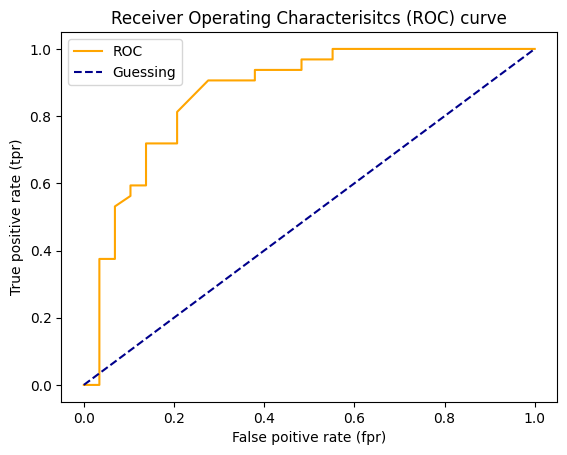

In [31]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plot ROC curve from given false positive rate (fpr)
    and true positive rate(tpr)
    """
    
    #plot ROC curve
    plt.plot(fpr, tpr, color= "orange", label= "ROC")
    
    #plot the baseline (no predicting power)
    plt.plot([0,1], [0,1], color= "darkblue", linestyle="--", label="Guessing")
    
    #customize the plot
    plt.xlabel("False poitive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characterisitcs (ROC) curve")
    plt.legend()
    plt.show()
    
    
plot_roc_curve(fpr, tpr)

In [32]:
len(thresholds)

26

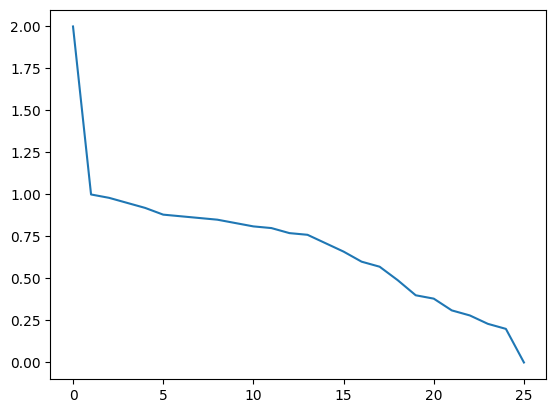

In [33]:
#ploting threshold
plt.plot(thresholds)

In [34]:
from sklearn.metrics import roc_auc_score #plotting for Area under curve
roc_auc_score(y_test, y_prob_positive)

0.8669181034482759

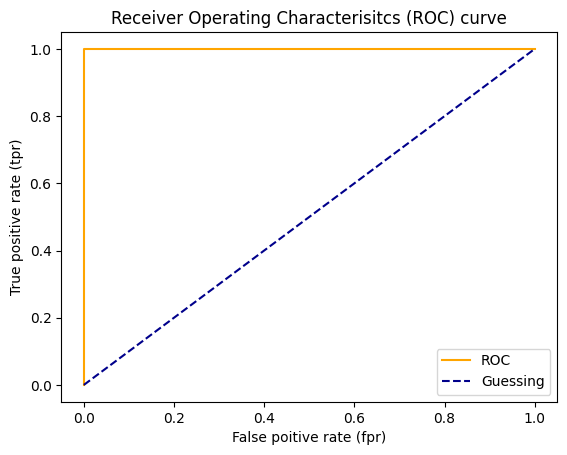

In [35]:
#Lets try for perfect score that roc gives. WHere there is no false positive
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [36]:
roc_auc_score(y_test, y_test)

1.0

**3. Confusion matrix**

In [37]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [38]:
pd.crosstab(y_test, y_preds, rownames=["Actual_label"], colnames=["predicted_lables"])

predicted_lables,0,1
Actual_label,,
0,23,6
1,6,26


![](../images/sklearn-confusion-matrix-anatomy.png)

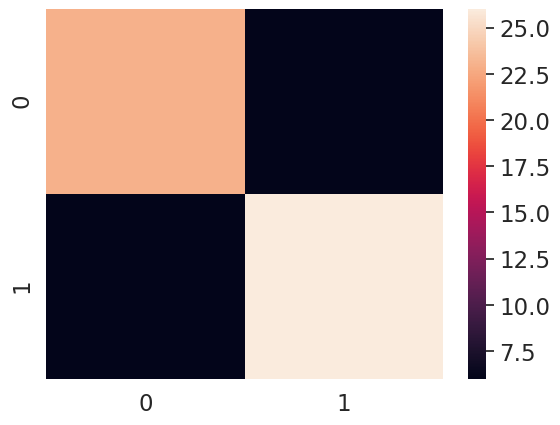

In [39]:
#Make our confusion matrix more visual with seaborn's heatmap()

import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

**Create confusion matx using scikit library**

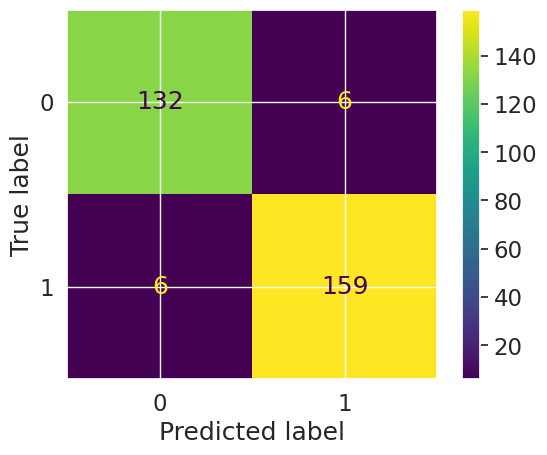

In [40]:
# Using SKlearn's inbuilt method

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y) # using itself create a prediction from X and y

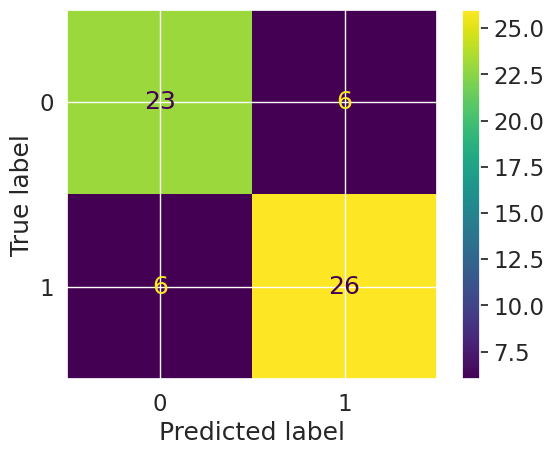

In [41]:
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred=y_preds)

**4. Classification report**

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



![](../images/ClassificationReportAnatomy.png)

### 4.2.2 Regression model evaluation metrics

1. R^2 (R-squared) or Coeff of determination
2. Mean Absolute Error
3. Mean Squared Error

**R-squared**

What R-squared does: Compares your model prediction to the mean of the targets, Values can range from negative infinity(a very poor model) to 1. 

For example,
* If all your model does is predict the mean of the target, Its R^2 value be 0.  
* If your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [49]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']
np.random.seed(42)


X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor()

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)



RandomForestRegressor()

In [53]:
model.score(x_test, y_test)

0.8066196804802649

In [55]:
from sklearn.metrics import r2_score

#Fill array with y_test_mean

y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

In [56]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error**

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error()